In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_excel("Iris.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
features = ['sepallength','sepalwidth','petallength', 'petalwidth']

In [6]:
X = df.loc[:,features].values

In [7]:
y = df.loc[:,['iris']].values

In [8]:
X = StandardScaler().fit_transform(X)

In [10]:
pd.DataFrame(data=X, columns=features).head()

,sepallength,sepalwidth,petallength,petalwidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
pca = PCA(n_components=2)
principalConponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalConponents, columns=['principal component 1', 'principal component 2'])

In [12]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [13]:
finalDf = pd.concat([principalDf, df[['iris']]], axis=1)
finalDf.head()

,principal component 1,principal component 2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


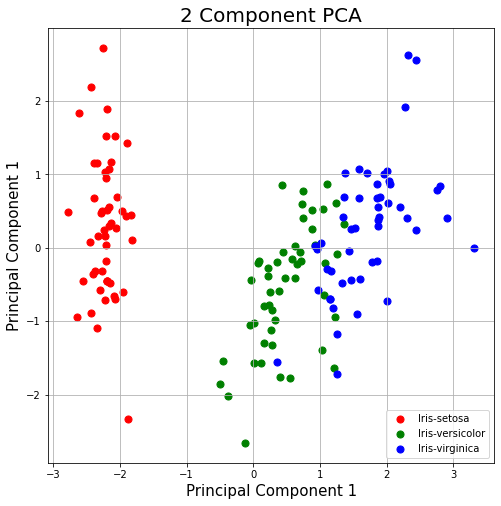

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize= 15)
ax.set_ylabel('Principal Component 1', fontsize= 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['iris'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
                finalDf.loc[indicesToKeep,'principal component 2'],
                c = color,
                s = 50
    )
ax.legend(targets)
ax.grid()